In [1]:
from Group_5_Module import my_table, table_join, mean_difference,single_linear,multi_linear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels
import datetime as datetime
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Report Name: Efficiency of Economic Development in Specific Countries from 1990 to 2012                                                                                  

## Introduction

1. It's an important topic in many countries that saving energy use and reducing pollutant emissions to increase the efficiceny of economic development. At present, the world's tendency is to pursue high efficiency of economic development instead of high increase in GDP. Therefore, our project is mainly to analyze the efficiency of economic development in some specific countries from 1990 to 2012.    ------(discuss in part 1)

2. The relationship between development of economy and the amount of greenhouse gas emissions was not considered during the period that GHG has not been observed. However, with the enconomy growth and the use of fossil fuel, the interacton between GHG and economy increased a lot. The problem that whether the increase of economy result in the GHG emissions or the increase of GHG emissions because people wants to save cost by fossil-fueled stimulate the economy is still not figured out. Therefore, we hope to find the causality between GHG emissions and economy by Granger Test.------------------------(discuss in part 2)

3. After obtaining the relationship between GHG emissions and economy, we prefer to exact relaationship between GHG emissions and economy per capita from 2 perspectives.-------(discuss in part 3)

4. The dataset divide the statistics about GHG emission by two means: classifying by different types of gases and classifying by the amount of GHG emission in different industries. We use regression models to observe their relationship.-----(discuss in part 4,5,6)

## Load data

In [3]:
ECO=pd.read_excel('http://datasets.wri.org/dataset/d1d7582d-2aa4-4d4e-a90c-8874001fa09d/resource/5ba45fa4-2288-48b3-9226-65ba178584a1/download/caitcountryghgemissions-alldata',\
             header=0,sheet_name='Socio-Economic Data')
GHG=pd.read_excel('http://datasets.wri.org/dataset/d1d7582d-2aa4-4d4e-a90c-8874001fa09d/resource/5ba45fa4-2288-48b3-9226-65ba178584a1/download/caitcountryghgemissions-alldata',\
             header=1,sheet_name='GHG Emissions')

In [4]:
#To display the top 5 rows of GHG
GHG.head(5)

,Country,Year,Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e),Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍),Total CO2 (excluding Land-Use Change and Forestry) (MtCO2),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Total CO2 (including Land-Use Change and Forestry) (MtCO2),Total CH4 (including Land-Use Change and Forestry) (MtCO2e),...,Industrial Processes (MtCO2e),Agriculture (MtCO2e),Waste (MtCO2e),Land-Use Change and Forestry (MtCO2),Bunker Fuels (MtCO2),Electricity/Heat (MtCO2),Manufacturing/Construction (MtCO2),Transportation (MtCO2),Other Fuel Combustion (MtCO2e),Fugitive Emissions (MtCO2e)
0,Afghanistan,1990,15.2969,15.9612,2.9907,9.3098,2.9943,0.0022,3.654722,9.309911,...,0.0571,7.3512,4.0390,0.6643,NaN,NaN,NaN,NaN,NaN,1.2556
1,Afghanistan,1991,15.3514,15.3516,2.7412,9.5144,3.0922,0.0036,2.741202,9.514511,...,0.0586,7.6393,4.2200,0.0002,NaN,NaN,NaN,NaN,NaN,1.0226
2,Afghanistan,1992,14.0513,14.0515,1.4252,9.5697,3.0513,0.0050,1.425242,9.569811,...,0.0637,7.6392,4.4011,0.0002,NaN,NaN,NaN,NaN,NaN,0.6026
3,Afghanistan,1993,14.0649,14.0650,1.3520,9.6081,3.0983,0.0065,1.352016,9.608191,...,0.0651,7.7102,4.5822,0.0002,NaN,NaN,NaN,NaN,NaN,0.4140
4,Afghanistan,1994,14.0222,14.0224,1.2971,9.7873,2.9300,0.0079,1.297056,9.787361,...,0.0665,7.7066,4.7633,0.0002,NaN,NaN,NaN,NaN,NaN,0.2473


In [5]:
#To display the top 5 rows of ECO
ECO.head(5)

,Country,Year,Population (People),GDP-PPP (Million Intl$ (2011)),GDP-USD (Million US$ (2005)),Energy Use (Thous. tonnes oil eq. (ktoe))
0,Afghanistan,1960,8774440.0,NaN,NaN,NaN
1,Albania,1960,1608800.0,NaN,NaN,NaN
2,Algeria,1960,11277757.0,NaN,19912.0,NaN
3,Angola,1960,4965988.0,NaN,NaN,NaN
4,Antigua & Barbuda,1960,54681.0,NaN,NaN,NaN


In [6]:
# Checking the data type in GHG
GHG.dtypes

Country                                                                  object
Year                                                                      int64
Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)     float64
Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)    float64
Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)              float64
Total CH4 (MtCO2e)                                                      float64
Total N2O (MtCO2e)                                                      float64
Total F-Gas (MtCO2e)                                                    float64
Total CO2 (including Land-Use Change and Forestry) (MtCO2)              float64
Total CH4 (including Land-Use Change and Forestry) (MtCO2e)             float64
Total N2O (including Land-Use Change and Forestry) (MtCO2e)             float64
Energy (MtCO2e)                                                         float64
Industrial Processes (MtCO2e)           

In [7]:
# Checking the data type in ECO
ECO.dtypes

Country                                       object
Year                                           int64
Population (People)                          float64
GDP-PPP (Million Intl$ (2011))               float64
GDP-USD (Million US$ (2005))                 float64
Energy Use (Thous. tonnes oil eq. (ktoe))    float64
dtype: object

##### Here, we check the data type, because sometimes the type of some columns will not match, If that's the case, we only need to convert the column to the type of data we need, then we can proceed with the analysis. In this case, the data format here is already correct, so there is no need to worry.

## Data Cleanup

The data cleanup will not be conducted in the begining of the report in case of losing important factors, but it will be mixed in the descriptive analysis.

In [8]:
# Total number of rows and columns in GHG
GHG.shape

(4324, 22)

In [9]:
# Total number of rows and columns in ECO
ECO.shape

(9964, 6)

In [10]:
# Rows containing duplicate data
duplicate_rows_GHG = GHG[GHG.duplicated()]
print("number of duplicate rows:", duplicate_rows_GHG.shape)

number of duplicate rows: (0, 22)


In [11]:
# Rows containing duplicate data
duplicate_rows_ECO = ECO[ECO.duplicated()]
print("number of duplicate rows:", duplicate_rows_ECO.shape)

number of duplicate rows: (0, 6)


Here, I reviewed and deleted all duplicate values from the data set. Both data sets do not contain duplicate values, so no need to remove

In [12]:
# Finding the null values in GHG
GHG.isnull().sum()

Country                                                                    0
Year                                                                       0
Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)      106
Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)     106
Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)                20
Total CH4 (MtCO2e)                                                       104
Total N2O (MtCO2e)                                                       103
Total F-Gas (MtCO2e)                                                       0
Total CO2 (including Land-Use Change and Forestry) (MtCO2)               103
Total CH4 (including Land-Use Change and Forestry) (MtCO2e)              241
Total N2O (including Land-Use Change and Forestry) (MtCO2e)              241
Energy (MtCO2e)                                                         1173
Industrial Processes (MtCO2e)                                            164

In [13]:
# Finding the null values in ECO
ECO.isnull().sum()

Country                                         0
Year                                            0
Population (People)                           192
GDP-PPP (Million Intl$ (2011))               5908
GDP-USD (Million US$ (2005))                 2306
Energy Use (Thous. tonnes oil eq. (ktoe))    4362
dtype: int64

From the above analysis, we can see that most of the columns we will use in the analysis have NA values. If we remove the NA values from the raw data, it will not be convenient for our subsequent analysis, so we will check and remove NA value in the specific problem if there is NA value.

## Descriptive Analysis and Data Visualization

### 1.The Economic Development Efficiency

The dataset provides us with the greenhouse gas emissions of different countries in different periods, as well as the economic data of various countries since 1960, such as GDP data. Therefore, we can calculate the economic development efficiency in different countries(GDP/ Greenhouse gas emissions).Also, How did the efficiency in some countries change over time ? Is there a diminishing marginal benefit?

#### 1.1 The Mean of Economic Development Efficiency of the World

Text(0.5, 1.0, 'Mean of Economic Development Efficiency of the World from 1990 to 2012')

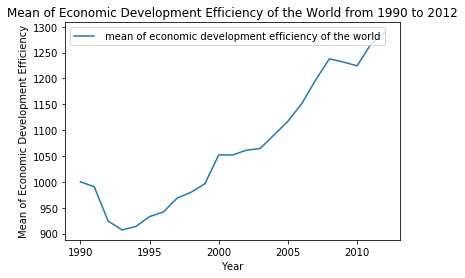

In [14]:
#Get the data
big_table=table_join(table_1=GHG,table_2=ECO)[['Country','Year','Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)','GDP-USD (Million US$ (2005))']].dropna()
#Get the new column that GDP/GHG
big_table['GDP/GHG']=big_table['GDP-USD (Million US$ (2005))']/big_table['Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']
#Plot the outcome
plt.plot(big_table.groupby(by=big_table['Year'])['GDP/GHG'].mean(),label=' mean of economic development efficiency of the world')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Mean of Economic Development Efficiency')
plt.title("Mean of Economic Development Efficiency of the World from 1990 to 2012") 

From the graph, we find an upward trend in the averge of the economic development efficiency of the world from 1993 to 2010. In addition, we decide to test significance of the difference in mean in 2000, 2005 and 2010. The results indicate that although the difference exists,they are not significant. 

In [15]:
#Get the data in 2000
GHG_2000=my_table(label=2000,sheet=GHG)[['Country','Year','Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']]
ECO_2000=my_table(label=2000,sheet=ECO)[['Country','Year','GDP-USD (Million US$ (2005))']]
table_2000=table_join(table_1=GHG_2000,table_2=ECO_2000).dropna()
table_2000['GDP/GHG']=table_2000['GDP-USD (Million US$ (2005))']/table_2000['Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']
#Get the data in 2005
GHG_2005=my_table(label=2005,sheet=GHG)[['Country','Year','Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']]
ECO_2005=my_table(label=2005,sheet=ECO)[['Country','Year','GDP-USD (Million US$ (2005))']]
table_2005=table_join(table_1=GHG_2005,table_2=ECO_2005).dropna()
table_2005['GDP/GHG']=table_2005['GDP-USD (Million US$ (2005))']/table_2005['Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']
#Get the data in 2010
GHG_2010=my_table(label=2010,sheet=GHG)[['Country','Year','Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']]
ECO_2010=my_table(label=2010,sheet=ECO)[['Country','Year','GDP-USD (Million US$ (2005))']]
table_2010=table_join(table_1=GHG_2010,table_2=ECO_2010).dropna()
table_2010['GDP/GHG']=table_2010['GDP-USD (Million US$ (2005))']/table_2010['Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']

Text(0, 0.5, 'Frequency')

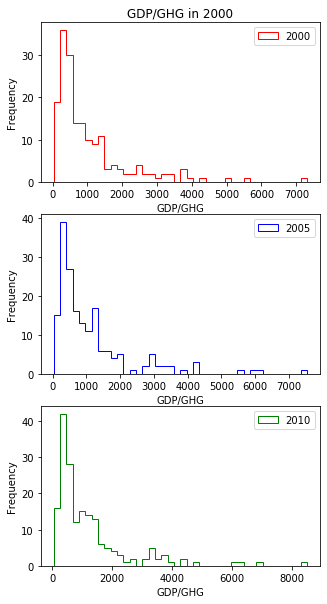

In [16]:
#Define the size of figure
plt.figure(figsize=(5,10))
#Get the plot of 2000
plt.subplot(3,1,1)
plt.hist(table_2000['GDP/GHG'],bins=40,histtype='step',color='red',label='2000')
plt.legend()
plt.xlabel('GDP/GHG')
plt.ylabel('Frequency')
plt.title("GDP/GHG in 2000") 
#Get the plot of 2005
plt.subplot(3,1,2)
plt.hist(table_2005['GDP/GHG'],bins=40,histtype='step',color='blue',label='2005')
plt.legend()
plt.xlabel('GDP/GHG')
plt.ylabel('Frequency')
#Get the plot of 2010
plt.subplot(3,1,3)
plt.hist(table_2010['GDP/GHG'],bins=40,histtype='step',color='green',label='2010')
plt.legend()
plt.xlabel('GDP/GHG')
plt.ylabel('Frequency')

In [17]:
#The difference in mean of 2000
mean_difference(group_1=table_2000['GDP/GHG'],group_2=table_2005['GDP/GHG'])
#The difference in mean of 2005
mean_difference(group_1=table_2005['GDP/GHG'],group_2=table_2010['GDP/GHG'])
#The difference in mean of 2010
mean_difference(group_1=table_2000['GDP/GHG'],group_2=table_2010['GDP/GHG'])

the difference in mean is not significant, p=0.5971518998616135
the difference in mean is not significant, p=0.4198051716781225
the difference in mean is not significant, p=0.18509896223169045


The distributions of the 3 years(2000, 2005,2010) listed above are very similar.In addition, neither of their difference in mean hypothesis test result(p_value) is greater than 0.05, which means they are insignificant. Therefore, we can't reject the null hypothesis that the mean of economic development efficiency of the world has changed from 2000 to 2010.

#### 1.2 Economic development efficiency in different years in the same country（take China as example)

In [18]:
# Create table concluding name of country China,year and total GHG emission
ghg_cn=my_table(label='China',sheet=GHG)[['Country','Year','Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']]

In [19]:
# Create table concluding name of country China,year and GDP
eco_cn=my_table(label='China',sheet=ECO)[['Country','Year','GDP-USD (Million US$ (2005))']]

In [20]:
# Join the two tables
df_cn = table_join(table_1=ghg_cn,table_2=eco_cn)
#create new column named GDP/GHG which reflects development efficiency
df_cn['GDP/GHG']=df_cn['GDP-USD (Million US$ (2005))']/df_cn['Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']

In [21]:
# Total number of rows and columns in df_cn
df_cn.shape

(23, 5)

In [22]:
# Finding the null values in df_cn
df_cn.isnull().sum()

Country                                                                 0
Year                                                                    0
Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)    0
GDP-USD (Million US$ (2005))                                            0
GDP/GHG                                                                 0
dtype: int64

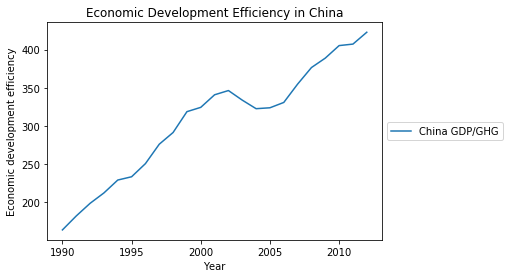

In [23]:
# Creating plot 
plt.plot(df_cn['Year'],df_cn['GDP/GHG'] , label='China GDP/GHG')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

#set the name of labels and title
plt.title('Economic Development Efficiency in China')
plt.xlabel('Year')
plt.ylabel('Economic development efficiency')
plt.show()

From the figure, we can see the trend of development efficiency in China is upward.We can estimate the country’s development efficiency by calculating the relationship between GDP and total amount of greenhouse gas emissions. From 1990 to 2012, the efficiency of economic development has increased more than doubled times. However, what we need to pay attention is that since 2003, China's development efficiency has shown a downward trend, and it has continued until around 2015.Therefore, there would be some negative factors affecting economic development in China at that time. For example, the SARS epidemic that broke out in 2003 caused hundreds of deaths, and most people stay at home and can not go to work. This would inevitably affect the pace of China's development at that time.

####  1.3 Economic development efficiency in the same years in different country（take China, US and United Kingdom as example)

In [24]:
#Economic development efficiency in different years in the US
#Create table concluding name of country US,year and total GHG emission
ghg_us=my_table(label='United States',sheet=GHG)[['Country','Year','Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']]
#Create table concluding name of country,year and GDP
eco_us=my_table(label='United States',sheet=ECO)[['Country','Year','GDP-USD (Million US$ (2005))']]
#Join the two tables
df_us = table_join(table_1=ghg_us,table_2=eco_us)
#Create new column named GDP/GHG which reflects development efficiency
df_us['GDP/GHG']=df_us['GDP-USD (Million US$ (2005))']/df_us['Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']

In [25]:
# Finding the null values in df_us
df_us.isnull().sum()

Country                                                                 0
Year                                                                    0
Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)    0
GDP-USD (Million US$ (2005))                                            0
GDP/GHG                                                                 0
dtype: int64

In [26]:
#Economic development efficiency in different years in the UK
#Create table concluding name of country UK,year and total GHG emission
ghg_uk=my_table(label='United Kingdom',sheet=GHG)[['Country','Year','Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']]
#Create table concluding name of country UK,year and GDP
eco_uk=my_table(label='United Kingdom',sheet=ECO)[['Country','Year','GDP-USD (Million US$ (2005))']]
#Join the two tables
df_uk = table_join(table_1=ghg_uk,table_2=eco_uk)
#Create new column named GDP/GHG which reflects development efficiency
df_uk['GDP/GHG']=df_uk['GDP-USD (Million US$ (2005))']/df_uk['Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']

In [27]:
# Finding the null values in df_uk
df_uk.isnull().sum()

Country                                                                 0
Year                                                                    0
Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)    0
GDP-USD (Million US$ (2005))                                            0
GDP/GHG                                                                 0
dtype: int64

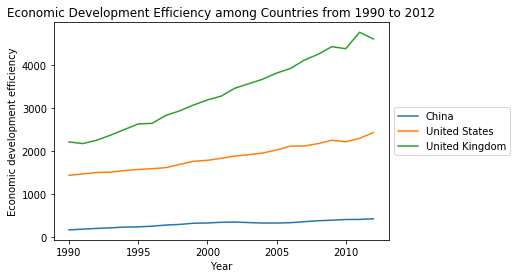

In [28]:
# Creating plot about development efficiency among three countries form 1990 to 2012
plt.plot(df_cn['Year'],df_cn['GDP/GHG'] , label='China')
plt.plot(df_us['Year'],df_us['GDP/GHG'] , label='United States')
plt.plot(df_uk['Year'],df_uk['GDP/GHG'] , label='United Kingdom')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#set name of labels and title
plt.title('Economic Development Efficiency among Countries from 1990 to 2012')
plt.xlabel('Year')
plt.ylabel('Economic development efficiency')
plt.show()

The three countries that the United States, the United Kingdom and China play an important role in the world's development and their activities might affect the development of the world. As can be seen from the above figure, the development efficiencies in the three countries were an upward trends from 1990 to 2012. However, There are also differences between them. China's development efficiency was relatively slow, which may be due to the large population base. The United Kingdom’s efficiency had the fastest growth among the three countries. Also, it is not difficult to see that China as a developing country, there was still a gap between China's development speed and the developed countries that the United States and the United Kingdom. China's development efficiency speed was far lower than that of the United Kingdom and the United States. What's more interesting is that around 2011, the development of the United Kingdom showed a downward trend. As an established power, the development of the United Kingdom has indeed encountered a bottleneck. 

Except analyzing the development efficiency of the United States, the United Kingdom and China, we can also analyze the development efficiency of the three countries in specific year. So, We chose to analyze the development efficiency of the three countries in 2003.

In [29]:
# The concat() function does all of the heavy lifting of performing concatenation operations
frames = [df_cn, df_us, df_uk]
df = pd.concat(frames)
#reset the index
df = df.reset_index(drop=True)

In [30]:
# Define a function to indicate the development efficiency of different countries in the same year
def country_DvEs(df, year):
    """
    :param df:define function for df and input the dataframe name
    :param year:input the specific year
    :return: return a data containing name of country,year and GDP/GHG 
    """
    df.set_index(['Country'], inplace=False)
    df = df.sort_index()
    df = df.loc[df['Year'] == year]
    df = df[['Country','Year','GDP/GHG']]
    return df
#Extract the development efficiency among three countries in 2003
country_DVEs_2003 = country_DvEs(df = df, year = 2003)
#Reset the index
country_DVEs_2003 = country_DVEs_2003.reset_index(drop=True)

In [31]:
#Get the outcome
country_DVEs_2003

,Country,Year,GDP/GHG
0,China,2003,333.642708
1,United States,2003,1912.891721
2,United Kingdom,2003,3561.998235


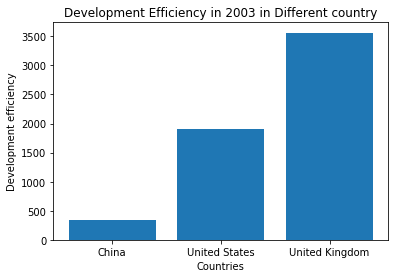

In [32]:
#Create bar plot
fig = plt.figure()
#Data to plot
countries = country_DVEs_2003['Country']
data_GP = country_DVEs_2003['GDP/GHG']
plt.bar(countries,data_GP)
#Set name of lables and title
plt.xlabel("Countries") 
plt.ylabel("Development efficiency") 
plt.title("Development Efficiency in 2003 in Different country") 
plt.show()

Through the above bar graph, we can understand that China, as a developing country, still lags far behind the Western countries in its degree of development.

### 2.Causal Relationship between the Growth Rate of GHG Emssion Per Capita and the Growth Rate of GDP Per Capita.

In this part, we use Granger Causality test to determine Causal Relationship between GHG Emission and GDP per capita. We use the data from 1990 to 2012 in America as example to discuss the topic. Since both series are time series, so we need to tansform them into stationary series by differencing and logarithm. To test the stationarity, we use ADF Test


The null hypothesis: X is not the Granger cause of Y

The alternative hypothesis: X is the Granger cause of Y


In [33]:
#Get the GHG data
ghg_us=my_table(label='United States',sheet=GHG)[['Country','Year','Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']]
#Get the GDP data
eco_us=my_table(label='United States',sheet=ECO)[['Country','Year','Population (People)','GDP-USD (Million US$ (2005))']]
#Join the two tables
table_us=table_join(table_1=ghg_us,table_2=eco_us)
table_us=table_us.set_index('Year')
#Add columns that GHG/Population and GDP/Population
table_us['GHG/Population']=table_us['Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']/table_us['Population (People)']*1000
table_us['GDP/Population']=table_us['GDP-USD (Million US$ (2005))']/table_us['Population (People)']*1000
log_diff_table_us=np.log(table_us[['GHG/Population','GDP/Population']]).diff().dropna()

In [34]:
#Check the whether the log(diff(GHG/Population)) series is stational
statsmodels.tsa.stattools.adfuller(log_diff_table_us['GHG/Population'],regression='ct',autolag="AIC")

(-3.9072815750703382,
 0.011856049103007023,
 6,
 15,
 {'1%': -4.7284062962962965,
  '5%': -3.7567874814814814,
  '10%': -3.323498888888889},
 -79.332769628681)

From the outcome, we can know that p_value= 0.0118<0.05, so the log(diff(GHG/Population)) series is stational.

In [35]:
#Check the whether the  log(diff(GDP/Population)) series is stational
statsmodels.tsa.stattools.adfuller(log_diff_table_us['GDP/Population'],regression='ctt',autolag="AIC")

(-5.098141045647013,
 0.0006934527857483368,
 7,
 14,
 {'1%': -5.50334581632653,
  '5%': -4.361056618075802,
  '10%': -3.8648280029154516},
 -101.22712944136237)

From the result, we can know that p_value= 0.00<0.01, log(diff(GDP/Population)) series is stational.

Text(0.5, 1.0, 'GHG/Population and GDP/Population from 1990 to 2012')

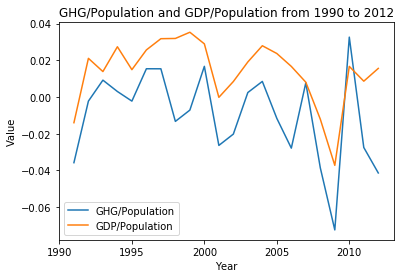

In [36]:
#Plot the graph
plt.plot(log_diff_table_us['GHG/Population'],label='GHG/Population')
plt.plot(log_diff_table_us['GDP/Population'],label='GDP/Population')
plt.legend()
plt.xlabel("Year") 
plt.ylabel("Value") 
plt.title("GHG/Population and GDP/Population from 1990 to 2012") 

The two series above shows that the change was almost synchronous, which may lead to an unsignificant p_value of Granger test. In other words, only when Y is the lag sequence of X the Granger test can generate a significant p_value; otherwise, when two series is synchronous or unrelational to each other, the Granger test is not significant.
For example, if we do the Granger test on two identical series, the test result will be insignificant because the change of two series are synchronous.


In [37]:
# This is an example of two "synchronous change" time series, the p_value=1 we cannot reject the null hypothesis.
grangercausalitytests(log_diff_table_us[['GDP/Population','GDP/Population']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=19, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=0.0000  , p=1.0000  , df=1
parameter F test:         F=3.7780  , p=0.0669  , df_denom=19, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=17, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=2.3786  , p=0.1228  , df_denom=17, df_num=2


{1: ({'ssr_ftest': (0.0, 1.0, 19.0, 1),
   'ssr_chi2test': (0.0, 1.0, 1),
   'lrtest': (5.684341886080802e-14, 0.9999998097694968, 1),
   'params_ftest': (3.777981965316344, 0.06689283160680481, 19.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.0, 1.0, 17.0, 2),
   'ssr_chi2test': (0.0, 1.0, 2),
   'lrtest': (-0.0, 1.0, 2),
   'params_ftest': (2.378592937686743, 0.1227983961652551, 17.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [38]:
 # This is an example of two "synchronous change" time series
grangercausalitytests(log_diff_table_us[['GHG/Population','GDP/Population']],maxlag=2)
grangercausalitytests(log_diff_table_us[['GDP/Population','GHG/Population']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5908  , p=0.4521  , df_denom=18, df_num=1
ssr based chi2 test:   chi2=0.6892  , p=0.4064  , df=1
likelihood ratio test: chi2=0.6781  , p=0.4102  , df=1
parameter F test:         F=0.5908  , p=0.4521  , df_denom=18, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7007  , p=0.2159  , df_denom=15, df_num=2
ssr based chi2 test:   chi2=4.5351  , p=0.1036  , df=2
likelihood ratio test: chi2=4.0874  , p=0.1295  , df=2
parameter F test:         F=1.7007  , p=0.2159  , df_denom=15, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6271  , p=0.4387  , df_denom=18, df_num=1
ssr based chi2 test:   chi2=0.7317  , p=0.3923  , df=1
likelihood ratio test: chi2=0.7192  , p=0.3964  , df=1
parameter F test:         F=0.6271  , p=0.4387  , df_denom=18, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4376  , p=0.6536  , df_d

{1: ({'ssr_ftest': (0.6271310959233048, 0.4387219650961468, 18.0, 1),
   'ssr_chi2test': (0.7316529452438557, 0.3923479287728887, 1),
   'lrtest': (0.7191958427109739, 0.3964078140456212, 1),
   'params_ftest': (0.6271310959233031, 0.4387219650961468, 18.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4376226589294281, 0.6535534395583512, 15.0, 2),
   'ssr_chi2test': (1.1669937571451414, 0.5579438892411179, 2),
   'lrtest': (1.1342159330123707, 0.5671633244785397, 2),
   'params_ftest': (0.43762265892942664, 0.6535534395583518, 15.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

From two test result above,we can't find a p_value that is significant(less than 0.05) which  can indicates which can indicates strong evidence to reject null hypothesis.
Therefore, we can't reject the null hypothesis that the growth rate of GHG emssion per capita is not the granger cause of growth rate of GDP per capita can't be rejected. 

We also can't reject another null hypothesis that the growth rate of GDP per capita is not the granger cause of growth rate of GHG emission per capita 

In other words, a causal realtionship between two variables can't be found. We think they are probably synchronous

### 3.The Relationship between GHG Emissions and the Amount of GDP  Per Capita (US as example)

From topic 2 we realized that the GDP per capita and GHG emission per capita are probably synchronous, then we can draw a linear relationship between them.

#### 3.1 Use America from 1990-2012 as Example

slope=0.5246272427055815, intercept=0.01932040326346207, r_value=0.7384230871193949, p_value=8.709679928971666e-05, std_err=0.10712923897300032


Text(0, 0.5, 'GDP/Population')

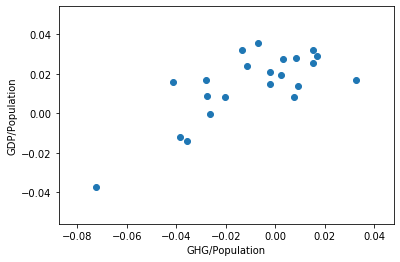

In [39]:
#draw the plot
single_linear(x=log_diff_table_us['GHG/Population'],y=log_diff_table_us['GDP/Population'])
plt.scatter(x=log_diff_table_us['GHG/Population'],y=log_diff_table_us['GDP/Population'])
plt.xlabel("GHG/Population")
plt.ylabel("GDP/Population")

From above, the p-value of the linear regression close to 0, which means the coefficient=0.5246 is significant, and we explain 73.84% variation of the response varaible.

#### 3.2 Use All Countries in 2006 as Example

In [40]:
#Get data about GHG and GDP in 2006.
GHG_2006=my_table(label=2006,sheet=GHG)[['Country','Year','Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']]
ECO_2006=my_table(label=2006,sheet=ECO)[['Country','Year','GDP-USD (Million US$ (2005))','Population (People)']]
#Join the two tables
table_2006=table_join(table_1=GHG_2006,table_2=ECO_2006).dropna()
#Add new columns that GHG/Population and GDP/Population
table_2006['GHG/Population']=table_2006['Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)']/table_2006['Population (People)']*1000
table_2006['GDP/Population']=table_2006['GDP-USD (Million US$ (2005))']/table_2006['Population (People)']*1000

Text(0.5, 1.0, 'The Relationship between GHG/Population and GDP/Population')

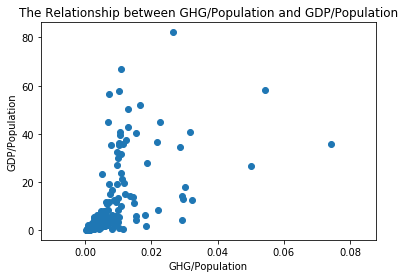

In [41]:
#Draw the plot
plt.scatter(x=table_2006['GHG/Population'],y=table_2006['GDP/Population'])
plt.xlabel("GHG/Population")
plt.ylabel("GDP/Population")
plt.title('The Relationship between GHG/Population and GDP/Population')

The scatter plot below indicates that the relationship between them is not linear, therefore, we did not built an linear regression.

Here we provide two perspectives. Perspective 1 is the time series of the United States. The model shows that there is indeed a stable and significant relationship between the two variables. Perspective 2 is cross-sectional data from multiple countries in 2006, the relationship between the two variables is not stable.

### 4.In this section, we have selected different industries in China as the research objects, and tried to visualize the development of the six industries from 1990 to 2012 by drawing pictures, so as to identify the industries that have seen significant increases in carbon emissions in recent years.

#### The Development of Greenhouse Gas Emissions in Different industries in a country.(China as sample)

Data seleted: greenhouse gas emissions data from different industries in China are required.

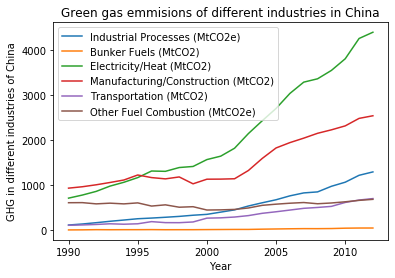

In [42]:
# Import and modify the dataset we use in this section.
GHG_EM=pd.read_excel('http://datasets.wri.org/dataset/d1d7582d-2aa4-4d4e-a90c-8874001fa09d/resource/5ba45fa4-2288-48b3-9226-65ba178584a1/download/caitcountryghgemissions-alldata',\
             header=1,sheet_name='GHG Emissions')

def get_country_industries(df, country):
    df = df.sort_index()
    df = df.loc[df['Country'] == country]
    df['cumsum'] = range(1, len(df)+1)
    df = df[['cumsum','Country','Year','Industrial Processes (MtCO2e)','Bunker Fuels (MtCO2)','Electricity/Heat (MtCO2)','Manufacturing/Construction (MtCO2)','Transportation (MtCO2)','Other Fuel Combustion (MtCO2e)']]
    return df

# Use ger_country_industries function to select the useful column  in the dataset GHG_EM.
China_INDS = get_country_industries(df = GHG_EM, country = 'China')
# Plot the figure with the data we have selected 
plt.plot(China_INDS['Year'],China_INDS['Industrial Processes (MtCO2e)'] , label='Industrial Processes (MtCO2e)')
plt.plot(China_INDS['Year'],China_INDS['Bunker Fuels (MtCO2)'] , label='Bunker Fuels (MtCO2)')
plt.plot(China_INDS['Year'],China_INDS['Electricity/Heat (MtCO2)'], label='Electricity/Heat (MtCO2)')
plt.plot(China_INDS['Year'],China_INDS['Manufacturing/Construction (MtCO2)'], label='Manufacturing/Construction (MtCO2)')
plt.plot(China_INDS['Year'],China_INDS['Transportation (MtCO2)'], label='Transportation (MtCO2)')
plt.plot(China_INDS['Year'],China_INDS['Other Fuel Combustion (MtCO2e)'], label='Other Fuel Combustion (MtCO2e)')
plt.legend() 
# Modify the title, xlable and the ylabel name.
plt.title('Green gas emmisions of different industries in China')
plt.xlabel('Year')
plt.ylabel('GHG in different industries of China')
plt.show()

From the above outcomes,we can know that with the development of China, the carbon emissions of various industries get a considerable impact. From the figure we plotted, the greenhouse gas emissions of the Electricity/Heat industry have grown rapidly to a very high level from 2000 to 2010. Also, industries other than Bunker Fuels have seen significant growth in greenhouse gas emissions. Furthermore, greenhouse gas emissions in Manufacturing/Construction and the Other fuel Combustion dropped significantly around 2000. At the same time, Electricity/Heat's greenhouse gas emissions began to surge. To have a briefly sum, Greenhouse gas emissions in the power industry and Manufacturing/Construction industry are closely related to the development of the country. Further, we can make an assumption that at around 2000, part of the Manufacturing/Construction industries is beginning to transform to Electricity/Heat industry.

### 5.Find the trend of greenhouse gases emissions in the selected countries.

The GHG Emissions table contains the annual greenhouse gas emissions of different countries from 1990 to 2012, including Total CO2 (excluding Land-Use Change and Forestry), Total CH4, Total N2O and other different gas emissions. Therefore, we can view the changes in the emissions of different gases in the same country over the years, and through comparison, we can also know the changes in greenhouse gas emissions between different countries.

#### The trend of greenhouse gases in the same country over the years（take China and the US as  example)

In [43]:
# Emissions of different gases in the same country at different period
def country_GHGs(df, country):
    """
    :param df:define function for df and input the df name
    :param country:input the name of country
    :return: return a data containing different greenhouse gas emissions in the same country from 1990 to 2012 
    """
    df = df.loc[df['Country'] == country]
    df = df[['Country','Year','Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)','Total CH4 (MtCO2e)','Total N2O (MtCO2e)','Total F-Gas (MtCO2e)','Total CO2 (including Land-Use Change and Forestry) (MtCO2)','Total CH4 (including Land-Use Change and Forestry) (MtCO2e)','Total N2O (including Land-Use Change and Forestry) (MtCO2e)']]
    df = df.reset_index(drop=True)
    return df

# Extract different greenhouse gas emissions in China from 1990 to 2012
China_GHG = country_GHGs(df = GHG, country = 'China')

In [44]:
# Finding the null values in China_GHG
China_GHG.isnull().sum()

Country                                                        0
Year                                                           0
Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)     0
Total CH4 (MtCO2e)                                             0
Total N2O (MtCO2e)                                             0
Total F-Gas (MtCO2e)                                           0
Total CO2 (including Land-Use Change and Forestry) (MtCO2)     0
Total CH4 (including Land-Use Change and Forestry) (MtCO2e)    0
Total N2O (including Land-Use Change and Forestry) (MtCO2e)    0
dtype: int64

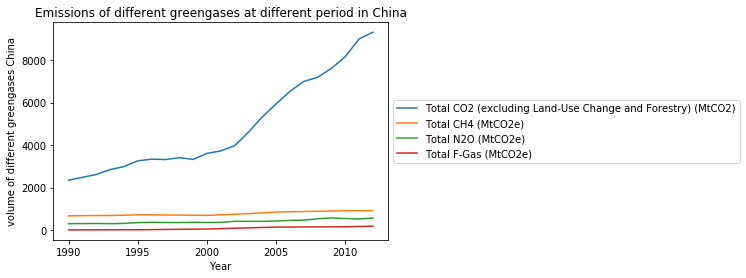

In [45]:
# Creat plot about diffrerent type of GHG in China from 1990 to 2012
plt.plot(China_GHG['Year'],China_GHG['Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)'] , label='Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)')
plt.plot(China_GHG['Year'],China_GHG['Total CH4 (MtCO2e)'] , label='Total CH4 (MtCO2e)')
plt.plot(China_GHG['Year'],China_GHG['Total N2O (MtCO2e)'], label='Total N2O (MtCO2e)')
plt.plot(China_GHG['Year'],China_GHG['Total F-Gas (MtCO2e)'], label='Total F-Gas (MtCO2e)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
# Create name of lables and title
plt.title('Emissions of different greengases at different period in China')
plt.xlabel('Year')
plt.ylabel('volume of different greengases China')
# Show plot
plt.show()

From the above figure, we can see that China’s carbon dioxide emissions have been increasing year by year since 1990. Especially in the early 20th century, China’s annual carbon dioxide emissions have increased dramatically. Compared with the beginning of the 20th century, carbon dioxide emissions in 2010 even more than quadrupled. Judging from the results of the massive emissions of greenhouse gases, China, as a developing country, had an industrial system gradually taking shape in the late 1990s, and the country’s center of gravity also tended to develop heavy industry to drive economic development, and the investment of a large amount of resources made a large number of heavy industry factories and mines. Obtain sufficient development space, such as aviation, steel, petroleum refining and other industries. The direct result is a massive increase in greenhouse gas emissions.

In [46]:
# Extract different greenhouse gas emissions in the US from 1990 to 2012
US_GHG = country_GHGs(df = GHG, country = 'United States')

In [47]:
# Finding the null values in US_GHG
US_GHG.isnull().sum()

Country                                                        0
Year                                                           0
Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)     0
Total CH4 (MtCO2e)                                             0
Total N2O (MtCO2e)                                             0
Total F-Gas (MtCO2e)                                           0
Total CO2 (including Land-Use Change and Forestry) (MtCO2)     0
Total CH4 (including Land-Use Change and Forestry) (MtCO2e)    0
Total N2O (including Land-Use Change and Forestry) (MtCO2e)    0
dtype: int64

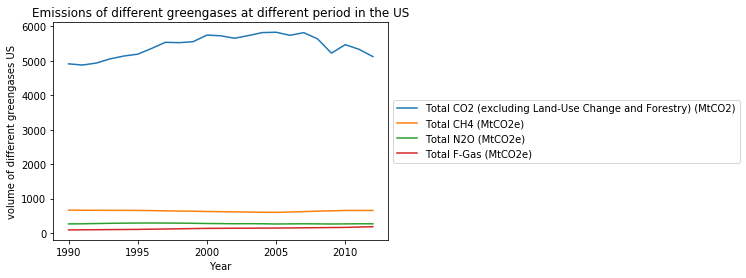

In [48]:
# Creat plot about diffrerent type of GHG in the USA from 1990 to 2012
plt.plot(US_GHG['Year'],US_GHG['Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)'] , label='Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)')
plt.plot(US_GHG['Year'],US_GHG['Total CH4 (MtCO2e)'] , label='Total CH4 (MtCO2e)')
plt.plot(US_GHG['Year'],US_GHG['Total N2O (MtCO2e)'], label='Total N2O (MtCO2e)')
plt.plot(US_GHG['Year'],US_GHG['Total F-Gas (MtCO2e)'], label='Total F-Gas (MtCO2e)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#create the name of labes and title
plt.title('Emissions of different greengases at different period in the US')
plt.xlabel('Year')
plt.ylabel('volume of different greengases US')
#show plot
plt.show()

Compared with China's greenhouse gas emissions from 1990 to 2020, which showed an upward trend year by year, the United States' greenhouse gas emissions showed a relatively stable trend. As can be seen from the figure above, in recent years, greenhouse gas emissions in the United States peaked around 2005, and then showed a downward trend year by year. As one of the world powerful country, the United States has developed a well-developed industrial system, and the number of vehicles per capita is also among the highest in the world. Therefore, from the figure above, we can see that since 1990, the carbon dioxide emissions in the United States have been around 5,000. After 2010, it is still around 5000. It is also because of the improvement of its industrial system and environmental governance system, as well as the development of science and technology, that its carbon dioxide emissions have also stabilized. And because of its environmental protection, greenhouse gas emissions have even shown a downward trend in recent years. Its promise to reduce greenhouse gas emissions by 20% has gradually become possible.

#### The proportion of different greenhouse gases in a specific country in a certain year

In [49]:
# Define a function to extract data of different greenhouse gases in a specific country in a certain year
def country_GHGs_year(df, country, year):
    """
    :param df:define function for df and input the dataframe name
    :param country:input the name of country
    :param year:input the specific year
    :return: return a data containing different greenhouse gas emissions in the same country in one year 
    """
    df = df[(df['Country'] == country) & (df['Year'] == year)]
    df = df[['Country','Year','Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)','Total CH4 (MtCO2e)','Total N2O (MtCO2e)','Total F-Gas (MtCO2e)','Total CO2 (including Land-Use Change and Forestry) (MtCO2)','Total CH4 (including Land-Use Change and Forestry) (MtCO2e)','Total N2O (including Land-Use Change and Forestry) (MtCO2e)']]
    df = df.reset_index(drop=True)
    return df

In [50]:
# The data concluding the different GHG emission in china in 1990
China_GHG_year = country_GHGs_year(df = GHG, country = 'China', year = 1990)

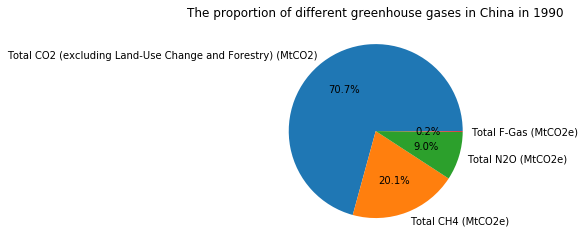

In [51]:
# Data to plot
Greengas = ['Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)', 'Total CH4 (MtCO2e)','Total N2O (MtCO2e)','Total F-Gas (MtCO2e)']
data = [float(China_GHG_year['Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)']), float(China_GHG_year['Total CH4 (MtCO2e)']), float(China_GHG_year['Total N2O (MtCO2e)']), float(China_GHG_year['Total F-Gas (MtCO2e)'])]
  
# Creating plot 
plt.pie(data, labels = Greengas,autopct='%1.1f%%') 
plt.title('The proportion of different greenhouse gases in China in 1990')
  
# show plot 
plt.show() 

In [52]:
# The data concluding the different GHG emission in china in 2012
China_GHG_year_2012 = country_GHGs_year(df = GHG, country = 'China', year = 2012)

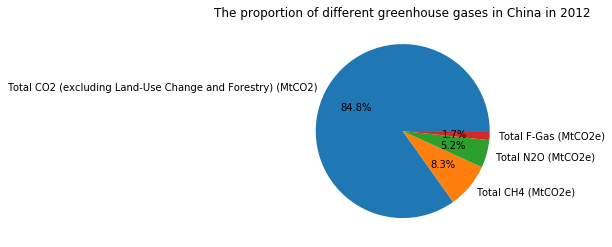

In [53]:
# Data to plot
Greengas = ['Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)', 'Total CH4 (MtCO2e)','Total N2O (MtCO2e)','Total F-Gas (MtCO2e)']
data = [float(China_GHG_year_2012['Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)']), float(China_GHG_year_2012['Total CH4 (MtCO2e)']), float(China_GHG_year_2012['Total N2O (MtCO2e)']), float(China_GHG_year_2012['Total F-Gas (MtCO2e)'])]
  
# Creating plot 
plt.pie(data, labels = Greengas,autopct='%1.1f%%') 
plt.title('The proportion of different greenhouse gases in China in 2012')
  
# Show plot 
plt.show() 

By comparing different greenhouse gas emissions in different years in the same country (this question uses China’s emissions in 1990 and 2012 as an example), the changes in its greenhouse gas emissions can be quickly obtained. It can be seen from the two pie charts that carbon dioxide emissions have increased significantly, from 36% in 1990 to 43.4% in 2012. The results are consistent with the previous analysis, which further proves the negative impact of the rapid development of China's industry. The reduction in nitrogen dioxide has been reduced from 4.6% before to 2.6% now. The possible reasons are the widespread restrictions on car travel in China, and the technological advancement of auto companies, which has effectively reduced car exhaust emissions. And automobile exhaust emissions are the main source of nitrogen dioxide. As the second largest greenhouse gas, methane is much more harmful than carbon dioxide. Therefore, converting methane into carbon dioxide for emission has become one of the methods adopted by countries. This may lead to a reduction in methane emissions.




### 6.The Relationships between the Green House Gas(GHG) Emission by Types and GHG by sectors
### (Predictive analysis)

The dataset includeds Chinese data from 1990-2012. It is a time series data. Usually the time series data has no stationarity, so we need to log the original time series and take their first difference sequence, then we can have a time series with stationarity, the reason we need to do that is to avoid "pseudo-regression" when using time series as variable in linear regression.

In [54]:
#Get teh GHG data in China
ghg_china=my_table(label='China',sheet=GHG)[['Country','Year', 'Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)',\
                                         'Total CH4 (MtCO2e)','Total N2O (MtCO2e)','Total F-Gas (MtCO2e)',\
                                           'Energy (MtCO2e)','Industrial Processes (MtCO2e)','Agriculture (MtCO2e)',\
                                           'Waste (MtCO2e)','Bunker Fuels (MtCO2)']]
#Get the log and difference
log_diff_ghg_china=np.log(ghg_china.iloc[:,2:]).diff()

#### ADF Test(is used to test the stationarity)

Non-stationary series may lead to spurious regression.

The null hypothesis of ADF test:the time series has at least one unit root(the time series is not stational).
The alternative hypothesis: the time series has no unit root(the time seris is stational)

In [55]:
# These are the significant adf Test, i will not list them individually because they are too much
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)'].dropna(),regression='c',autolag="AIC")
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Total CH4 (MtCO2e)'].dropna(),regression='nc',autolag="AIC")
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Total N2O (MtCO2e)'].dropna(),regression='ctt',autolag="AIC")
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Energy (MtCO2e)'].dropna(),regression='c',autolag="AIC")
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Industrial Processes (MtCO2e)'].dropna(),regression='c',autolag="AIC")
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Agriculture (MtCO2e)'].dropna(),regression='c',autolag="AIC")

# These are insignificant ADF test
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Total F-Gas (MtCO2e)'].dropna(),regression='nc',autolag="AIC")
statsmodels.tsa.stattools.adfuller(log_diff_ghg_china['Bunker Fuels (MtCO2)'].dropna(),regression='c',autolag="AIC")

(-2.3467143428264166,
 0.15734378478322075,
 9,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 -41.76630099408965)

From the statistics, we can know that the stational variable are:Total CO2, Total CH4, Total N2O, Energy, Industrial Processes, Agriculture.

Only these variables will be used in the regression.

In [56]:
#Get the corresponding X
x_china=log_diff_ghg_china.iloc[:,[4,6,7]]
#Get the log value of Y
y_co2=log_diff_ghg_china.loc[:,'Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)']
y_ch4=log_diff_ghg_china.loc[:,'Total CH4 (MtCO2e)']
y_n2o=log_diff_ghg_china.loc[:,'Total N2O (MtCO2e)']

                                                OLS Regression Results                                                
Dep. Variable:     Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)   R-squared:                       0.994
Model:                                                                    OLS   Adj. R-squared:                  0.993
Method:                                                         Least Squares   F-statistic:                     1059.
Date:                                                        Sat, 12 Dec 2020   Prob (F-statistic):           2.01e-20
Time:                                                                15:12:44   Log-Likelihood:                 95.550
No. Observations:                                                          22   AIC:                            -183.1
Df Residuals:                                                              18   BIC:                            -178.7
Df Model:                                       

/Users/jessie/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'Value')

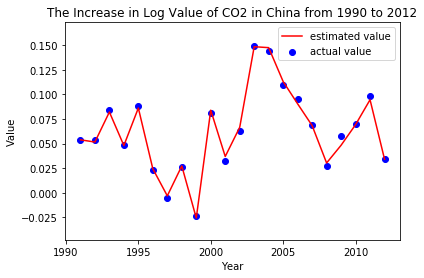

In [57]:
#Get the multiple regression of log value of CO2
multi_linear(x=x_china,y=y_co2,year=ghg_china['Year'])
plt.title('The Increase in Log Value of CO2 in China from 1990 to 2012')
plt.xlabel('Year')
plt.ylabel('Value')

The Energy are significant here, it indicates that increase(decrease) 1 unit of logarithmic growth rate of Energy will increase(decrease) 1.0015 unit of Logarithmic growth rate of CO2, and we explain 99% of variance of the Logarithmic growth rate of CO2.

                            OLS Regression Results                            
Dep. Variable:     Total CH4 (MtCO2e)   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     8.192
Date:                Sat, 12 Dec 2020   Prob (F-statistic):            0.00120
Time:                        15:12:44   Log-Likelihood:                 67.258
No. Observations:                  22   AIC:                            -126.5
Df Residuals:                      18   BIC:                            -122.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0025 

Text(0, 0.5, 'Value')

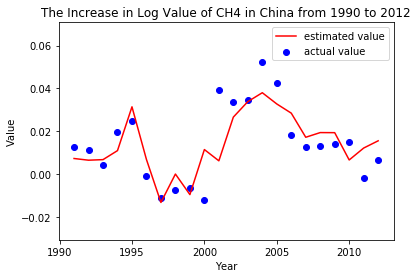

In [58]:
#Get the multiple regression of CH4
multi_linear(x=x_china,y=y_ch4,year=ghg_china['Year'])
plt.title('The Increase in Log Value of CH4 in China from 1990 to 2012')
plt.xlabel('Year')
plt.ylabel('Value')

The energy and agriculture are significant here. it indicates that increase(decrease) one unit of log growth rate of energy or agriculture will result increase(decrease) 0.2760 or 0.2760 log growth rate of of CH4.

                            OLS Regression Results                            
Dep. Variable:     Total N2O (MtCO2e)   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           2.72e-13
Time:                        15:12:45   Log-Likelihood:                 70.581
No. Observations:                  22   AIC:                            -133.2
Df Residuals:                      18   BIC:                            -128.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0028 

Text(0, 0.5, 'Value')

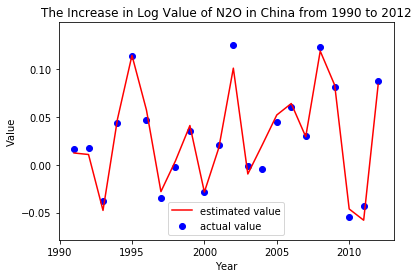

In [59]:
#Get the multiple regression of N2O
multi_linear(x=x_china,y=y_n2o,year=ghg_china['Year'])
plt.title('The Increase in Log Value of N2O in China from 1990 to 2012')
plt.xlabel('Year')
plt.ylabel('Value')

The agriculture are significant here, it indicates that increase(decrease) 1 unit of logarithmic growth rate of Agriculture will increase(decrease) 1.4371 unit of Logarithmic growth rate of N2O, and we exlain 96% of variance of the Logarithmic growth rate of N2O.

### 7. How to Reduce the Amount of GHG Emissions but Still Increase the GDP.

 From above analysis, we can know that the amount of GHG emissions in China increased a lot from 2003 to 2010, and during this period, the electricity/heat(MtCO2) and manufacturing/construction(MtCO2) increased a lot. Therefore, we can know that these two types of indutries occupied big proportion of GHG emissions from 2003 to 2010 in China. People in China can figure out whether there are good and effective ways to use renewable energy sources in electricity/heat industry such as wind turbines and solar photovoltaic(World Nuclear Association,2020). By using renewable enery sources in electricity/heat industry in China, people can have lower GHG emissions and high GDP. 
From different researches,the ways that namely greater resource, energy efficiency, investment in infrastructure and enhanced innovation can reduce the greenhouse gases but increase the economy.

## Conclusion

From our project, we can know that the relationship between GHG emissions and GDP in different industries and different countries is totally different because different countries have different national conditions, populations and national issues. As for some developed countries, the population is not an influence as for the GHG emissions. However, as for some high population developing countries, population can be an important factor which can affect the amount of GHG emissions. In addition, there's positive relationship between GDP and GHG emissions, so people should find good ways to control the amount of GHG emissions meanwhile increase the economy.

References:
Cassady, M. (2015). Cutting Carbon Pollution While Promoting Economic Growth. Retrieved  from https://www.americanprogress.org/issues/green/reports/2015/05/27/113865/cutting-carbon-pollution-while-promoting-economic-growth/
World Nuclear Association (2020). Renewable Energy and Electricity. Retrieved from https://www.world-nuclear.org/information-library/energy-and-the-environment/renewable-energy-and-electricity.aspx